# Project Machine Learning
### Ilaria Refaat Ghobrial 18P3050
### Hana Yasser Amgad 18P5007

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

## Reading the data

In [2]:
df =pd.read_csv("data.csv",index_col=0)
print(df.head())

   location  country  gender   age  vis_wuhan  from_wuhan  symptom1  symptom2  \
0       104        8       1  66.0          1           0        14        31   
1       101        8       0  56.0          0           1        14        31   
2       137        8       1  46.0          0           1        14        31   
3       116        8       0  60.0          1           0        14        31   
4       116        8       1  58.0          0           0        14        31   

   symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
0        19        12         3         1             8       1  
1        19        12         3         1             0       0  
2        19        12         3         1            13       0  
3        19        12         3         1             0       0  
4        19        12         3         1             0       0  


In [3]:
#show how many labels each variable has
for col in df.columns:
    print (col,':', len(df[col].unique()),'labels')  

location : 139 labels
country : 34 labels
gender : 3 labels
age : 81 labels
vis_wuhan : 2 labels
from_wuhan : 2 labels
symptom1 : 25 labels
symptom2 : 32 labels
symptom3 : 20 labels
symptom4 : 13 labels
symptom5 : 4 labels
symptom6 : 2 labels
diff_sym_hos : 18 labels
result : 2 labels


## One Hot Encoding

In [4]:
pd.get_dummies(df.iloc[:, 0:2])

,location,country
0,104,8
1,101,8
2,137,8
3,116,8
4,116,8
...,...,...
858,48,3
859,0,0
860,3,1
861,24,9


One hot encoding of the attributes location and country. In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

Selecting the top 20  locations based on their values

In [5]:
top_20_location= [x for x in df.location.value_counts().sort_values(ascending=False).head(20).index]
top_20_location

[108,
 45,
 44,
 114,
 110,
 106,
 99,
 116,
 85,
 117,
 135,
 13,
 78,
 10,
 121,
 51,
 12,
 128,
 9,
 19]

Selecting the top 20 countries based on their values

In [6]:
top_20_country= [x for x in df.country.value_counts().sort_values(ascending=False).head(20).index]
top_20_country

[18, 8, 13, 24, 12, 29, 11, 28, 25, 23, 4, 30, 32, 31, 15, 2, 7, 19, 33, 21]

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
def one_hot_top_x(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+str(int(label))]=np.where(df[variable]==label, 1, 0)
    

In [8]:
one_hot_top_x(df,'location',top_20_location)

In [9]:
one_hot_top_x(df,'country',top_20_country)

df.columns.tolist()

['location',
 'country',
 'gender',
 'age',
 'vis_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'diff_sym_hos',
 'result',
 'location_108',
 'location_45',
 'location_44',
 'location_114',
 'location_110',
 'location_106',
 'location_99',
 'location_116',
 'location_85',
 'location_117',
 'location_135',
 'location_13',
 'location_78',
 'location_10',
 'location_121',
 'location_51',
 'location_12',
 'location_128',
 'location_9',
 'location_19',
 'country_18',
 'country_8',
 'country_13',
 'country_24',
 'country_12',
 'country_29',
 'country_11',
 'country_28',
 'country_25',
 'country_23',
 'country_4',
 'country_30',
 'country_32',
 'country_31',
 'country_15',
 'country_2',
 'country_7',
 'country_19',
 'country_33',
 'country_21']

Dropping the attributes country and location after the one hot encoding

In [10]:
df=df.drop(['country'],axis=1)
df=df.drop(['location'],axis=1)
df.columns.tolist()

['gender',
 'age',
 'vis_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'diff_sym_hos',
 'result',
 'location_108',
 'location_45',
 'location_44',
 'location_114',
 'location_110',
 'location_106',
 'location_99',
 'location_116',
 'location_85',
 'location_117',
 'location_135',
 'location_13',
 'location_78',
 'location_10',
 'location_121',
 'location_51',
 'location_12',
 'location_128',
 'location_9',
 'location_19',
 'country_18',
 'country_8',
 'country_13',
 'country_24',
 'country_12',
 'country_29',
 'country_11',
 'country_28',
 'country_25',
 'country_23',
 'country_4',
 'country_30',
 'country_32',
 'country_31',
 'country_15',
 'country_2',
 'country_7',
 'country_19',
 'country_33',
 'country_21']

Rearranging the data

In [11]:
cols = df.columns.tolist()
cols = cols[12:52] + cols[0:12]

In [12]:
df = df[cols]
df.head()

,location_108,location_45,location_44,location_114,location_110,location_106,location_99,location_116,location_85,location_117,location_135,location_13,location_78,location_10,location_121,location_51,location_12,location_128,location_9,location_19,country_18,country_8,country_13,country_24,country_12,country_29,country_11,country_28,country_25,country_23,country_4,country_30,country_32,country_31,country_15,country_2,country_7,country_19,country_33,country_21,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66.0,1,0,14,31,19,12,3,1,8,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,0,1,14,31,19,12,3,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46.0,0,1,14,31,19,12,3,1,13,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,1,0,14,31,19,12,3,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,58.0,0,0,14,31,19,12,3,1,0,0


Setup X and Y data

In [13]:
X=df.iloc[:,0:51].values
Y=df.iloc[:,51].values

## Normalization of the data

In [14]:
from sklearn.preprocessing import StandardScaler
Normalized = StandardScaler()
Normalized.fit(X)

X = Normalized.transform(X)

In [15]:
print(X[1])

[-0.33053668 -0.31521906 -0.22899569 -0.21164638 -0.19939668 -0.1930275
 -0.1930275  -0.16173847 -0.15792599 -0.15792599 -0.15003949 -0.14595128
 -0.14595128 -0.14175529 -0.14175529 -0.14175529 -0.13299879 -0.11874787
 -0.11362569 -0.11362569 -0.49891344  2.13722763 -0.34121767 -0.33268921
 -0.25835842 -0.21164638 -0.20559798 -0.19939668 -0.1962341  -0.1930275
 -0.14175529 -0.14175529 -0.13299879 -0.12841335 -0.12841335 -0.11362569
 -0.10827432 -0.10265789 -0.09673017 -0.06823912 -1.17049947  0.43794272
 -0.47157142  2.87742418  0.46575536  0.40135529  0.24491398  0.13516128
  0.05466758  0.03406014 -0.42222993]


## Data Selection

Using the function SelectKBest() extract the best features of given dataset. The SelectKBest method selects the features according to the k highest score.

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X= SelectKBest(f_classif, k=12).fit_transform(X, Y)
print(X.shape)


(863, 12)


In [17]:
print(X[1])

[-0.31521906 -0.15792599 -0.49891344 -0.34121767 -0.11362569  0.43794272
 -0.47157142  2.87742418  0.46575536  0.40135529  0.13516128 -0.42222993]


In [18]:
#splitting data into 60% train 20%test 20% validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,shuffle = True, random_state = 3)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
   # test_size=0.25, random_state= 8)

# KNN Classifier


The optimum K is  3.


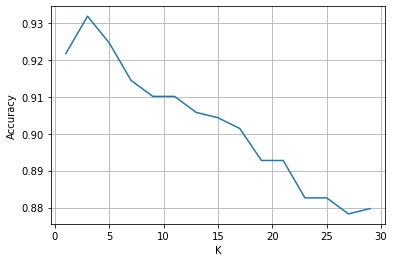

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



list_of_Kneighbors=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

#accuracy
accuracy=[]

#creating KNN model
#training model using cv of 10

for K in list_of_Kneighbors:     
    Knn = KNeighborsClassifier(n_neighbors=K)
    Knn_Scores=cross_val_score(Knn, x_train, y_train, cv=10 )
    accuracy.append(np.mean(Knn_Scores))
    
#get optimum K 
optimum_K = list_of_Kneighbors[accuracy.index(max(accuracy))]

print('\nThe optimum K is  %d.' % optimum_K)
plt.plot(list_of_Kneighbors, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [20]:
classifierKnn = KNeighborsClassifier(n_neighbors=optimum_K)
classifierKnn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_predKnn = classifierKnn.predict(x_test)

### Computing the confusion matrix of our model

Computing the confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
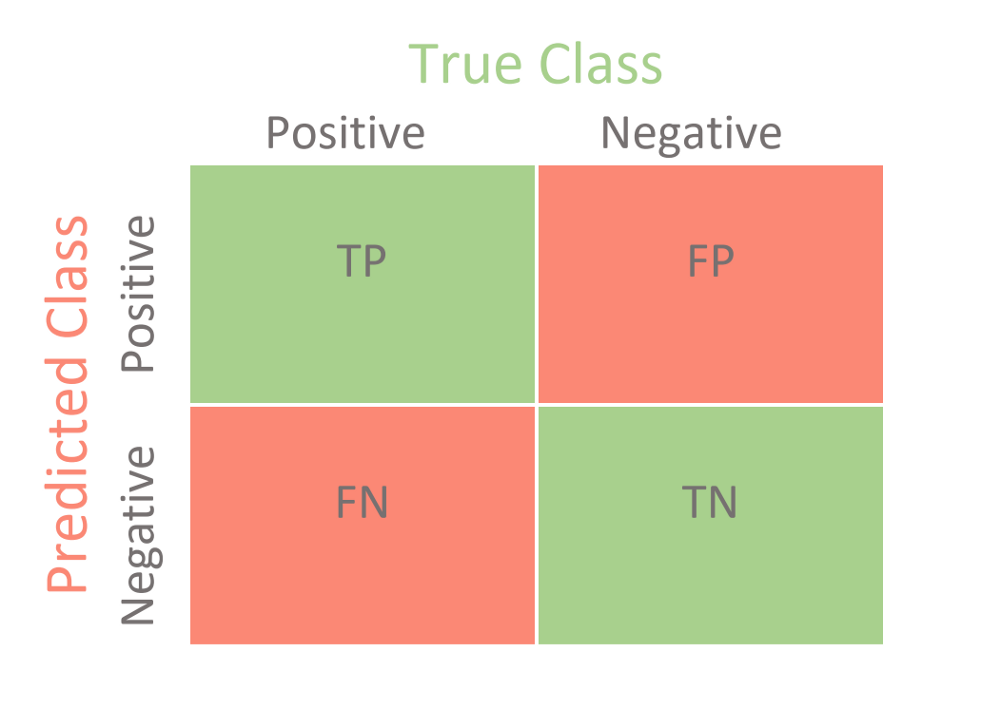

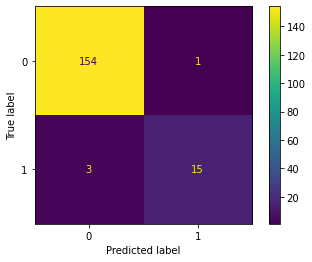

In [22]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(classifierKnn,x_test, y_test)

### Calculating the precision, recall, F1 and accuracy of our model.

In [23]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_predKnn, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.938


In [24]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_predKnn, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.833


In [25]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_predKnn, average='binary')
print('F1_Score: %.3f' % score)

F1_Score: 0.882


In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_predKnn)*100

97.6878612716763

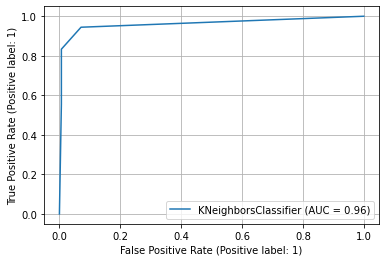

In [27]:
from sklearn.metrics import  plot_roc_curve
plot_roc_curve(classifierKnn, x_test, y_test)
plt.grid()

# Naive Bayes Classifier

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.
Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.
Naive assumption

Now, its time to put a naive assumption to the Bayes’ theorem, which is, independence among the features. So now, we split evidence into the independent parts.

Now, if any two events A and B are independent, then,


Now, as the denominator remains constant for a given input, we can remove that term:

Now, we need to create a classifier model. For this, we find the probability of given set of inputs for all possible values of the class variable y and pick up the output with maximum probability. This can be expressed mathematically as:



In [28]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=3)

 Gaussian Naive Bayes: Sklearn implementation 

Training our model

In [29]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(x_train,y_train)

GaussianNB()

In [30]:
y_predNB=clf_NB.predict(x_test)

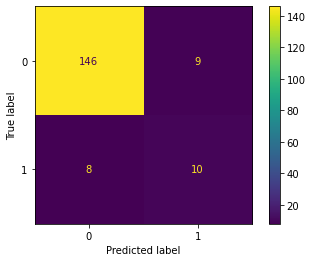

In [31]:
plot_confusion_matrix(clf_NB,x_test, y_test)

In [32]:
precision = precision_score(y_test, y_predNB, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.526


In [33]:
recall = recall_score(y_test, y_predNB, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.556


In [34]:
score = f1_score(y_test, y_predNB, average='binary')
print('F1_Score: %.3f' % score)

F1_Score: 0.541


In [35]:
metrics.accuracy_score(y_test,y_predNB)*100

90.17341040462428

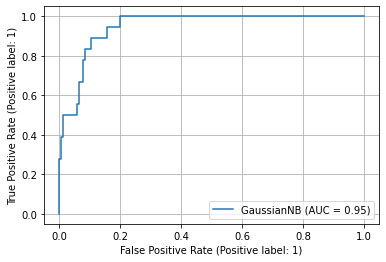

In [36]:
plot_roc_curve(clf_NB, x_test, y_test)
plt.grid() 

# Logistic Regression Classifier

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. the dependent variable is binary in nature having data coded as either 1 (stands for Death) or 0 (stands for recovered), as represented in our data set

In [37]:
from sklearn.linear_model import LogisticRegression


Creating a list that contains classifier's parameters.

In [38]:
model_params={
    'logistic regression':{
        'model':LogisticRegression(solver='liblinear', penalty='l2'),
        'params':{
            'C':[1,5,10]

        }

}
}

Using GridSearchCV to determine best C value that gives best score, after applying cross-validation

In [39]:
from sklearn.model_selection import GridSearchCV
#list of scores
scores=[]
#performing 10-fold cross validation
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [40]:
#printing model name, best_score and best_params values
dataFrame=pd.DataFrame(scores,columns=['model','best_score','best_params'])
dataFrame

,model,best_score,best_params
0,logistic regression,0.949275,{'C': 1}


In [41]:
classifierLR=LogisticRegression(C=1,solver='liblinear',penalty='l2')

Training our model

In [42]:
classifierLR.fit(x_train,y_train)

LogisticRegression(C=1, solver='liblinear')

Predicting the labels of the data values on the basis of the trained model.

y_pred = classifier.predict(X_test)

In [43]:
y_predLR = classifierLR.predict(x_test)

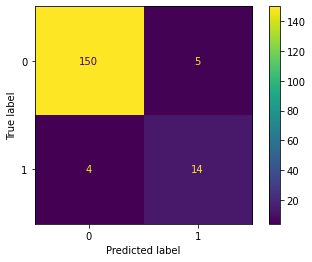

In [44]:
plot_confusion_matrix(classifierLR,x_test, y_test)

In [45]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predLR)
cnf_matrix

array([[150,   5],
       [  4,  14]], dtype=int64)

In [46]:
precision = precision_score(y_test, y_predLR, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.737


In [47]:
recall = recall_score(y_test, y_predLR, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.778


In [48]:
score = f1_score(y_test, y_predLR, average='binary')
print('F1_Score: %.3f' % score)

F1_Score: 0.757


In [49]:
metrics.accuracy_score(y_test,y_predLR)*100

94.79768786127167

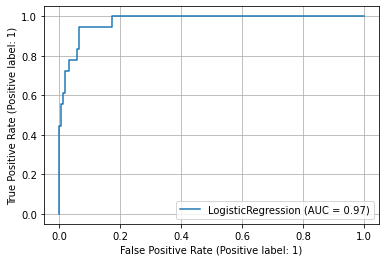

In [50]:
plot_roc_curve(classifierLR, x_test, y_test)
plt.grid() 

# Decision Tree Classifier

## Entropy

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Perform a cross validation to get the optimum depth of the decision tree

In [52]:
crossValidationScores = []
for i in range(2,20):
    clf_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=i,random_state=3)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf_entropy, X=x_train, y=y_train, cv=10, n_jobs=4)
    crossValidationScores.append((scores.mean()))
best_depth=crossValidationScores.index(max(crossValidationScores))+1
print(crossValidationScores)
print(best_depth)

[0.9231884057971014, 0.9405797101449276, 0.9521739130434783, 0.946376811594203, 0.9434782608695652, 0.9420289855072465, 0.9420289855072463, 0.9405797101449276, 0.9420289855072463, 0.9405797101449276, 0.9376811594202898, 0.9405797101449276, 0.9434782608695652, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465]
3


In [53]:
clf_entropy= DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=3)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

In [54]:
y_pred_entropy= clf_entropy.predict(x_test)


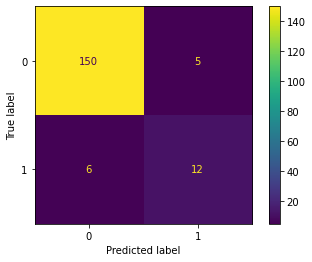

In [55]:
plot_confusion_matrix(clf_entropy,x_test, y_test)

accuracy score: 0.9364161849710982
f-1 score: 0.6857142857142857
precision_score: 0.7058823529411765
recall_score: 0.6666666666666666


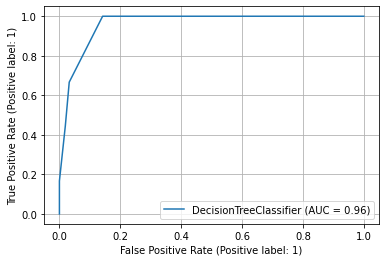

In [56]:

print('accuracy score:',accuracy_score(y_test, y_pred_entropy))
print('f-1 score:',f1_score(y_test, y_pred_entropy))
print('precision_score:',precision_score(y_test, y_pred_entropy))
print('recall_score:',recall_score(y_test, y_pred_entropy))
plot_roc_curve(clf_entropy, x_test, y_test)
plt.grid() 

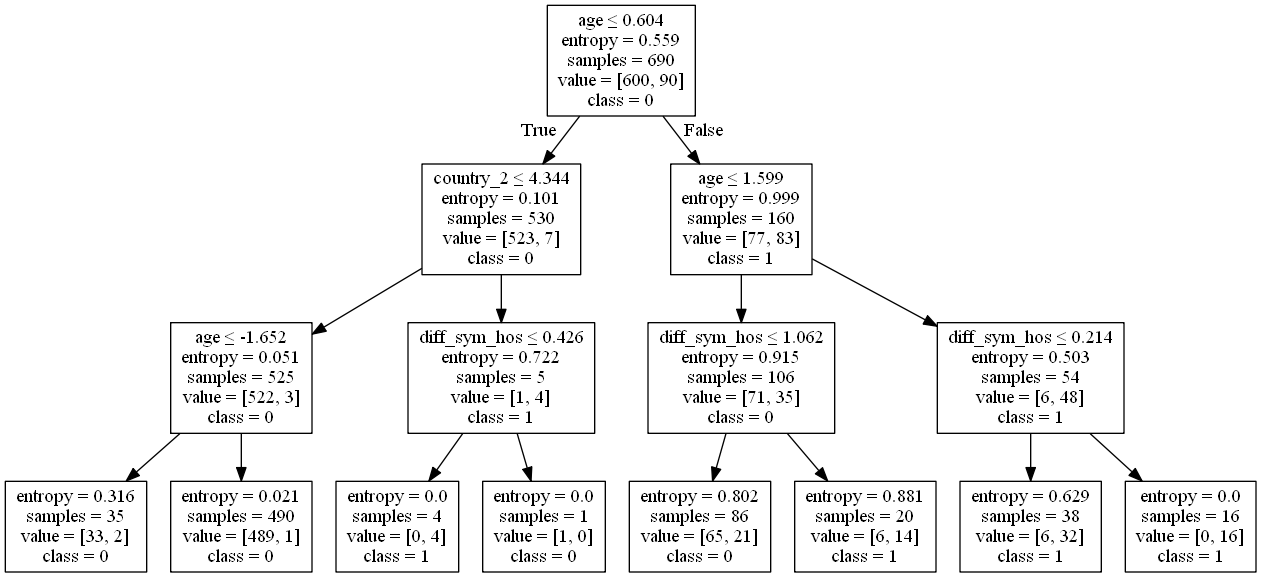

In [57]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus
Features=['location_45','location_85','country_18','country_13','country_2','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom4','diff_sym_hos']
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                special_characters=True,feature_names = Features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('EntropyTree.png')
Image(graph.create_png())

## Gini

In [58]:
crossValidationScores = []
for i in range(2,20):
    clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=3)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf_gini, X=x_train, y=y_train, cv=10, n_jobs=4)
    crossValidationScores.append((scores.mean()))
best_depth=crossValidationScores.index(max(crossValidationScores))+1
print(crossValidationScores)
print(best_depth)

[0.9362318840579711, 0.9376811594202898, 0.9507246376811596, 0.9521739130434783, 0.9391304347826086, 0.9333333333333333, 0.9362318840579711, 0.9405797101449276, 0.9376811594202898, 0.9405797101449276, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465, 0.9420289855072465]
4


In [59]:
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=best_depth,random_state=3)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=3)

In [60]:
y_pred_gini= clf_gini.predict(x_test)


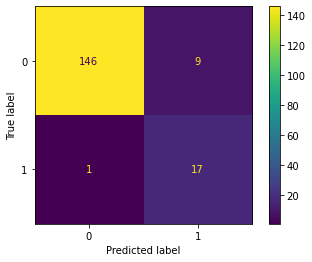

In [61]:
plot_confusion_matrix(clf_gini,x_test, y_test)

accuracy score: 0.9421965317919075
f-1 score: 0.7727272727272727
precision_score: 0.6538461538461539
recall_score: 0.9444444444444444


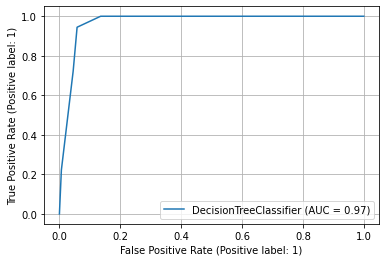

In [62]:
print('accuracy score:',accuracy_score(y_test, y_pred_gini))
print('f-1 score:',f1_score(y_test, y_pred_gini))
print('precision_score:',precision_score(y_test, y_pred_gini))
print('recall_score:',recall_score(y_test, y_pred_gini))
plot_roc_curve(clf_gini, x_test, y_test)
plt.grid() 

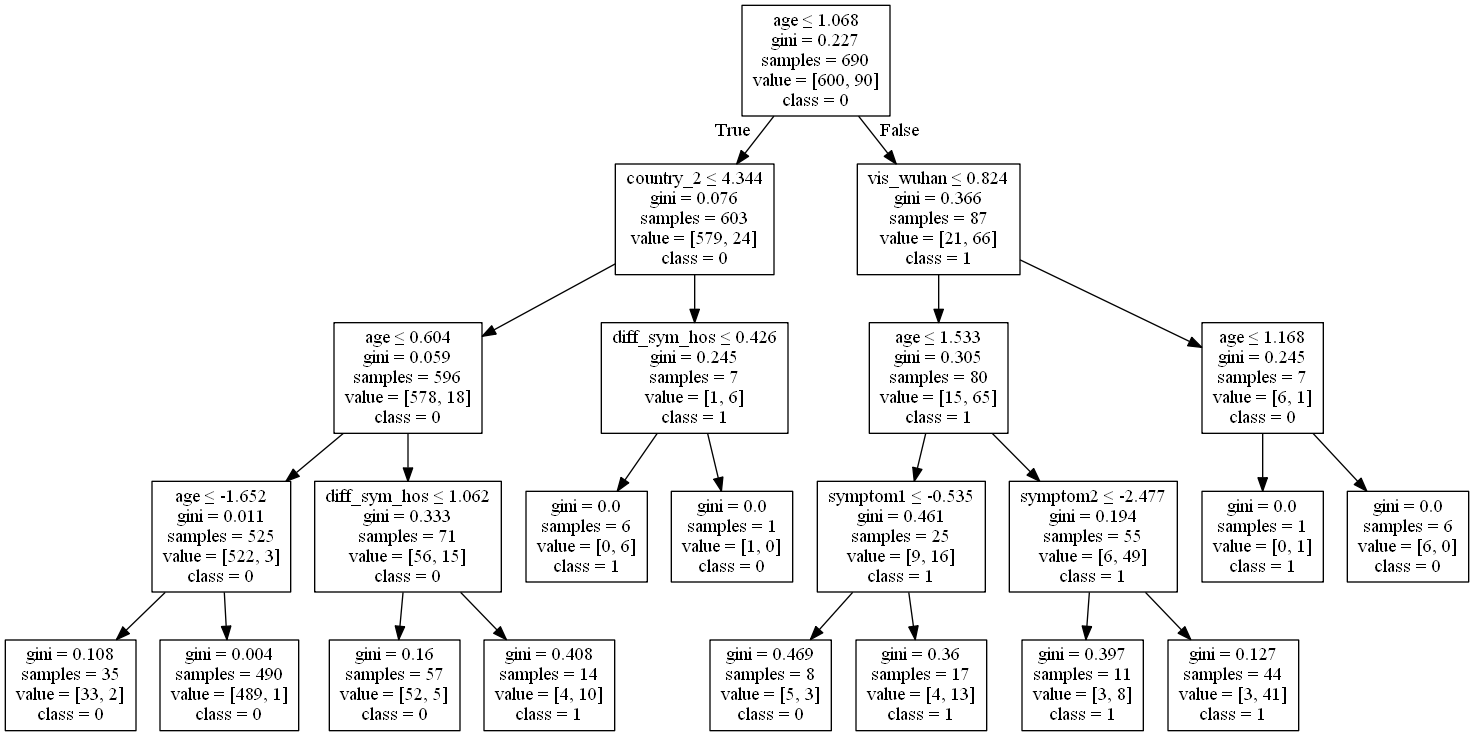

In [63]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                special_characters=True,feature_names = Features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GiniTree.png')
Image(graph.create_png())

# Support Vector Machine classifier

Finding the best prameters (gamma,'C') values using cross validation

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C':[0.5,1,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']
     
    },
]
optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(x_train,y_train)
print (optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [65]:
clf_svm=SVC(random_state=3,C=10,gamma=0.01)
clf_svm.fit(x_train,y_train)

SVC(C=10, gamma=0.01, random_state=3)

In [66]:
y_predSVM = clf_svm.predict(x_test)

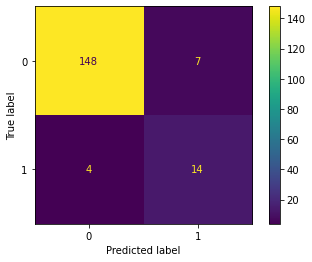

In [67]:
plot_confusion_matrix(clf_svm,x_test, y_test)

In [68]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predSVM)
cnf_matrix 

array([[148,   7],
       [  4,  14]], dtype=int64)

In [69]:
precision = precision_score(y_test, y_predSVM, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.667


In [70]:
recall = recall_score(y_test, y_predSVM, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.778


In [71]:
score = f1_score(y_test, y_predSVM, average='binary')
print('F1_Score: %.3f' % score)

F1_Score: 0.718


In [72]:
metrics.accuracy_score(y_test,y_predSVM)*100

93.64161849710982

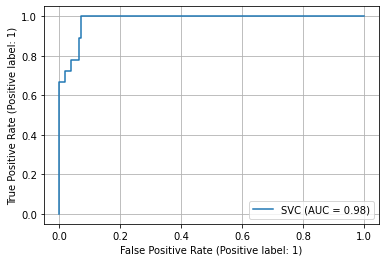

In [73]:
plot_roc_curve(clf_svm, x_test, y_test)
plt.grid() 

## Comparaison of all classifiers 
Comparing all classifiers using different metrics such as the precision, recall, F1-score, andROC/AUC curves.

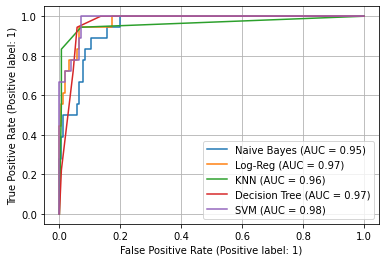

In [74]:
display = plot_roc_curve(clf_NB, x_test, y_test,name="Naive Bayes")
plot_roc_curve(classifierLR, x_test, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(classifierKnn,x_test,y_test,ax=display.ax_,name="KNN")
plot_roc_curve(clf_gini,x_test,y_test,ax=display.ax_,name="Decision Tree")
plot_roc_curve(clf_svm,x_test,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()

Looking at the AUC of all the classifiers in the graph above, the SVM has the biggest AUC and the Naive bayes has the lowest.

In [75]:
def make_spider(row, title, color):

    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.25, .5, 0.75, 1], ["0.25", "0.5",
               "0.75", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ind1
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

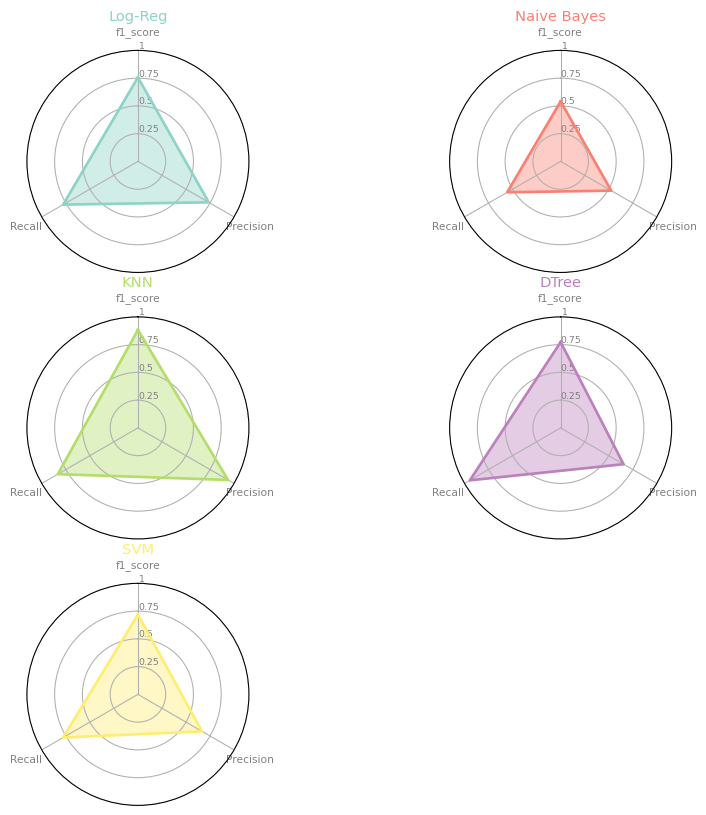

In [76]:
from math import pi
# Set data
df = pd.DataFrame({
    'group': ['Log-Reg', 'Naive Bayes', 'KNN', 'DTree', 'SVM'],
    'f1_score': [f1_score(y_test, y_predLR),  f1_score(y_test, y_predNB), f1_score(y_test, y_predKnn), f1_score(y_test, y_pred_gini), f1_score(y_test, y_predSVM)],
    'Precision': [precision_score(y_test, y_predLR),  precision_score(y_test, y_predNB), precision_score(y_test, y_predKnn),precision_score(y_test, y_pred_gini), precision_score(y_test, y_predSVM)],
    'Recall': [recall_score(y_test,y_predLR),  recall_score(y_test, y_predNB),  recall_score(y_test, y_predKnn),  recall_score(y_test, y_pred_gini),  recall_score(y_test, y_predSVM)],
})



# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set3", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=df['group'][row], color=my_palette(row))